## Data

### Geospatial

In [5]:
# Load fine-grained geospatial images
###a=Epi.LoadImage("Airports", user);
###as=Epi.LoadImage("Airports+Stations", user);
###asr=Epi.LoadImage("Airports+Stations+Railways", user);
###asrr=Epi.LoadImage("Airports+Stations+Railways+Roads", user);
###asrrb=Epi.LoadImage("Airports+Stations+Railways+Roads+Built1", user);
###asrrbb=Epi.LoadImage("Airports+Stations+Railways+Roads+Built1+Built2", user);
###[a as asr asrr asrrb asrrbb]

### Administrative 

In [6]:
#Load multi-scale administrative maps
###regions=Epi.LoadImage("Regions", user);
###provinces=Epi.LoadImage("Provinces", user);
###municipalities=Epi.LoadImage("Municipalities", user);
###[regions provinces municipalities]

In [7]:
# Load multi-layer administrative proximity graph image 
###proximity_multiplex_graph = Epi.LoadImage("AdministrativeProximityMultiplexGraph", user) 

### Population

In [8]:
# Load population data
@everywhere population_data = Epi.LoadData("ProvincialPopulation", user);
# Load age-stratified population data
@everywhere age_population_data = Epi.LoadData("AgeStratifiedProvincialPopulation", user); 
# Load population pyramid image 
###population_age_structure = Epi.LoadImage("AgeStructure", user) 

### Contact

In [9]:
# Load contact data for all locations
@everywhere all_contact_data=Epi.LoadData("AllEdgeList", user)
# Build contact graph for all locations
@everywhere all_contact_graph=SimpleWeightedDiGraph(all_contact_data[1].+1, all_contact_data[2].+1, all_contact_data[3]);
# Load contact matrix plot for all locations
###all_contact_image=Epi.LoadImage("All", user)

# Load contact data for home
@everywhere home_contact_data=Epi.LoadData("HomeEdgeList", user)
# Build contact graph for home
@everywhere home_contact_graph=SimpleWeightedDiGraph(home_contact_data[1].+1, home_contact_data[2].+1, home_contact_data[3]);
# Load contact matrix plot for home
###home_contact_image=Epi.LoadImage("Home", user)

# Load contact data for work
@everywhere work_contact_data=Epi.LoadData("WorkEdgeList", user)
# Build contact graph for work
@everywhere work_contact_graph=SimpleWeightedDiGraph(work_contact_data[1].+1, work_contact_data[2].+1, work_contact_data[3]);
# Load contact matrix plot for work
###work_contact_image=Epi.LoadImage("Work", user)

# Load contact data for school
@everywhere school_contact_data=Epi.LoadData("SchoolEdgeList", user)
# Build contact graph for school
@everywhere school_contact_graph=SimpleWeightedDiGraph(school_contact_data[1].+1, school_contact_data[2].+1, school_contact_data[3]);
# Load contact matrix plot for school
###school_contact_image=Epi.LoadImage("School", user)

# Load contact data for other locations
@everywhere other_contact_data=Epi.LoadData("OtherEdgeList", user)
# Build contact graph for other locations
@everywhere other_contact_graph=SimpleWeightedDiGraph(other_contact_data[1].+1, other_contact_data[2].+1, other_contact_data[3]);
# Load contact matrix plot for other locations
###other_contact_image=Epi.LoadImage("Other", user)

###[home_contact_image work_contact_image school_contact_image other_contact_image]

### Mobility

In [10]:
# Load mobility data
@everywhere mobility_data_phase1 = Epi.LoadData("Flow1", user)
@everywhere mobility_data_phase2 = Epi.LoadData("Flow2", user)
@everywhere mobility_data_phase3 = Epi.LoadData("Flow3", user)
@everywhere mobility_data_phase4 = Epi.LoadData("Flow4", user)
# Build mobility graphs 
@everywhere mobility_graph_phase1 = SimpleWeightedDiGraph(mobility_data_phase1[1], mobility_data_phase1[2], mobility_data_phase1[3])
@everywhere mobility_graph_phase2 = SimpleWeightedDiGraph(mobility_data_phase2[1], mobility_data_phase2[2], mobility_data_phase2[3])
@everywhere mobility_graph_phase3 = SimpleWeightedDiGraph(mobility_data_phase3[1], mobility_data_phase3[2], mobility_data_phase3[3])
@everywhere mobility_graph_phase4 = SimpleWeightedDiGraph(mobility_data_phase4[1], mobility_data_phase4[2], mobility_data_phase4[3])
# Build initial mobility graph
@everywhere mobility_graph = SimpleWeightedDiGraph(mobility_data_phase1[1], mobility_data_phase1[2], mobility_data_phase1[3])
# Remove the 104/5/6/7th node: provincial code doesn't exist
for i in 1:4
    rem_vertex!(mobility_graph_phase1, 104)
    rem_vertex!(mobility_graph_phase2, 104)
    rem_vertex!(mobility_graph_phase3, 104)
    rem_vertex!(mobility_graph_phase4, 104)
    rem_vertex!(mobility_graph, 104)
end
# Load mobility images
###mobility_phase1_image = Epi.LoadImage("Phase1", user)	
###mobility_phase2_image = Epi.LoadImage("Phase2", user)
###mobility_phase3_image = Epi.LoadImage("Phase3", user)
###mobility_phase4_image = Epi.LoadImage("Phase4", user)
#Display mobility images
###[mobility_phase1_image mobility_phase2_image mobility_phase3_image mobility_phase4_image]

### Epidemiological

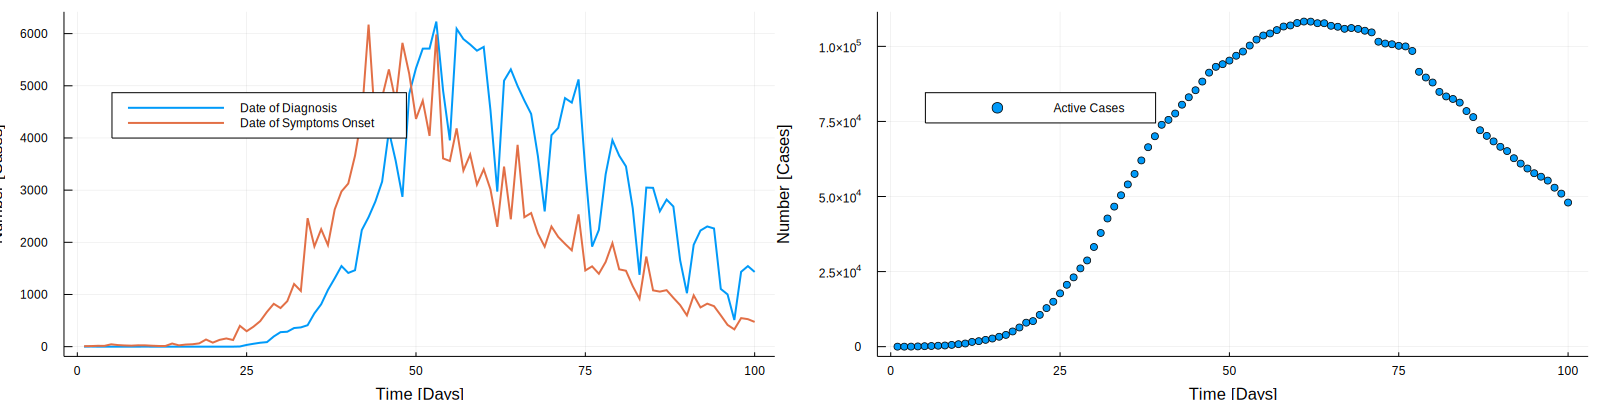

In [11]:
# Load data on confirmed COVID-19 active cases
@everywhere active_cases=Epi.LoadData("Active", user) 
# Load data on confirmed cumulative COVID-19 cases 
@everywhere cumulative_cases=Epi.LoadData("Deaths", user) 
# Extract confirmed cumulative COVID-19 deaths 
@everywhere cumulative_deaths=cumulative_cases["Deaths"]
# Load data on confirmed COVID-19 cases by date of diagnosis and symptoms onset
@everywhere symptoms_diagnosis_cases=Epi.LoadData("SymptomsDiagnosis", user)
# Load data on COVID-19 tests and tested patients
@everywhere tests = Epi.LoadData("Tests", user).DailyTestsWeeklyAverage

# Plot time series of confirmed COVID-19 cases by date of diagnosis vs. symptoms onset
plot_cases=plot(1:100,symptoms_diagnosis_cases["Diagnosis"][1:100],
                label="Date of Diagnosis",
                xlab="Time [Days]",
                ylabel="Number [Cases]",
                #title="COVID-19 Confirmed Cases in Italy", 
                legend=:topleft,
                lw=2)
            plot!(plot_cases,1:100,symptoms_diagnosis_cases["Symptoms"][1:100],
                 label="Date of Symptoms Onset",
                 lw=2);
# Plot time series confirmed confirmed COVID-19 active cases 
plot_active=plot(1:100,active_cases["Active Cases"][1:100],
    label="Active Cases",
    xlab="Time [Days]",
    ylabel="Number [Cases]",
    #title="COVID-19 Confirmed Cases in Italy", 
    legend=:topleft,
    lw=2,
    seriestype=:scatter);
# Display time series 
plot(plot_cases, plot_active, layout=2, size=(1600,400))